In [ ]:
path='/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/dataset/'

In [ ]:
"""Un-Comment For Running locally out of colab
path='./dataset'
"""#Un-Comment For Running locally out of colab 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")
labels = pd.read_csv(path+"test_labels.csv")

In [ ]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Check for Null Values in the dataset

In [ ]:
train.isnull().any(),test.isnull().any()

(id               False
 comment_text     False
 toxic            False
 severe_toxic     False
 obscene          False
 threat           False
 insult           False
 identity_hate    False
 dtype: bool, id              False
 comment_text    False
 dtype: bool)

Add Lemmatisation

In [ ]:
classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[classes].values
list_sentences_train = train["comment_text"]
list_sentences_test = test["comment_text"]

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [ ]:
tokenizer.word_counts

OrderedDict([('explanation\r', 9),
             ('why', 17810),
             ('the', 496418),
             ('edits', 9891),
             ('made', 9672),
             ('under', 7000),
             ('my', 45610),
             ('username', 1816),
             ('hardcore', 166),
             ('metallica', 35),
             ('fan', 1020),
             ('were', 15417),
             ('reverted', 3893),
             ('they', 27309),
             ("weren't", 424),
             ('vandalisms', 38),
             ('just', 27804),
             ('closure', 87),
             ('on', 89904),
             ('some', 22581),
             ('gas', 331),
             ('after', 8487),
             ('i', 204349),
             ('voted', 302),
             ('at', 39508),
             ('new', 10659),
             ('york', 896),
             ('dolls', 23),
             ('fac', 313),
             ('and', 224021),
             ('please', 29742),
             ("don't", 22913),
             ('remove', 5134),
           

In [ ]:
tokenizer.word_index

{'the': 1,
 '\r': 2,
 'to': 3,
 'of': 4,
 'and': 5,
 'a': 6,
 'you': 7,
 'i': 8,
 'is': 9,
 'that': 10,
 'in': 11,
 'it': 12,
 'for': 13,
 'this': 14,
 'not': 15,
 'on': 16,
 'be': 17,
 'as': 18,
 'have': 19,
 'are': 20,
 'your': 21,
 'with': 22,
 'if': 23,
 'article': 24,
 'was': 25,
 'or': 26,
 'but': 27,
 'my': 28,
 'page': 29,
 'an': 30,
 'wikipedia': 31,
 'from': 32,
 'by': 33,
 'do': 34,
 'at': 35,
 'about': 36,
 'me': 37,
 'so': 38,
 'talk': 39,
 'what': 40,
 'can': 41,
 'there': 42,
 'all': 43,
 'has': 44,
 'will': 45,
 'please': 46,
 'no': 47,
 'would': 48,
 'one': 49,
 'like': 50,
 'just': 51,
 'they': 52,
 'he': 53,
 'which': 54,
 'any': 55,
 'been': 56,
 'should': 57,
 'more': 58,
 'we': 59,
 "don't": 60,
 'some': 61,
 'other': 62,
 'who': 63,
 'see': 64,
 'here': 65,
 'also': 66,
 'his': 67,
 'think': 68,
 'because': 69,
 'know': 70,
 'how': 71,
 'am': 72,
 'edit': 73,
 "i'm": 74,
 'why': 75,
 'people': 76,
 'up': 77,
 'only': 78,
 "it's": 79,
 'out': 80,
 'use': 81,
 'whe

In [ ]:
list_tokenized_train[:1]

[[75,
  1,
  128,
  130,
  177,
  28,
  670,
  4510,
  12133,
  1115,
  87,
  331,
  52,
  2269,
  11510,
  51,
  6926,
  16,
  61,
  2747,
  149,
  8,
  2933,
  35,
  116,
  1235,
  15747,
  2859,
  5,
  46,
  60,
  243,
  1,
  370,
  32,
  1,
  39,
  29,
  144,
  74,
  3474,
  90,
  3075,
  4630,
  2284,
  985]]

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [ ]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Check which maxlen is better


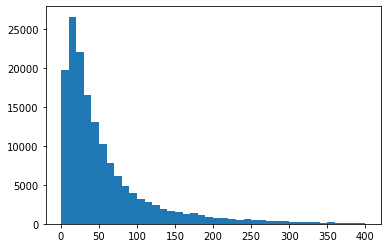

In [ ]:
plt.hist(totalNumWords,bins = np.arange(0,410,10))
plt.show()

In [ ]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation

In [ ]:
inp = Input(shape=(maxlen, ))

In [ ]:
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

In [ ]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)

In [ ]:
from keras.layers import Bidirectional, GlobalMaxPool1D

In [ ]:
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)

In [ ]:
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)

In [ ]:
from keras.models import Model
import keras.metrics as metrics

In [ ]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=[
                          metrics.MeanSquaredError(),
                          metrics.AUC(),
                  ])

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 128)          2560000   
_________________________________________________________________
lstm_layer (LSTM)            (None, 200, 60)           45360     
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)               

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_t,y,test_size=0.1,random_state=1) 

In [ ]:
batch_size = 32
epochs = 2
model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/2
4488/4488 [==============================] - 173s 39ms/step - loss: 0.0683 - mean_squared_error: 0.0184 - auc: 0.9613
Epoch 2/2
4488/4488 [==============================] - 172s 38ms/step - loss: 0.0454 - mean_squared_error: 0.0128 - auc: 0.9838


In [ ]:
preds_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score

print(roc_auc_score(y_train, preds_train))


0.9877859251140199


In [ ]:
print(y_train)
print(preds_train)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 1 1 0 0 0]]
[[1.58875447e-03 5.73829652e-07 1.44560749e-04 3.38950304e-06
  8.32082223e-05 7.67667734e-06]
 [1.30676432e-03 2.02101637e-06 2.71607947e-04 6.88714408e-06
  1.11395195e-04 1.57726936e-05]
 [1.24347804e-04 4.31987317e-08 1.58412349e-05 2.56467217e-07
  5.85646603e-06 5.59150408e-07]
 ...
 [8.69866181e-03 1.29650962e-05 1.12550077e-03 6.28937560e-05
  7.24008307e-04 9.39095407e-05]
 [3.15113701e-02 4.72706452e-05 2.46283016e-03 3.86468862e-04
  3.02377413e-03 5.57197200e-04]
 [9.92160976e-01 1.30405232e-01 9.68598783e-01 6.75370963e-03
  7.08355546e-01 4.00505774e-02]]


In [ ]:
preds_val = model.predict(X_val)
print(roc_auc_score(y_val, preds_val))


0.9754874105887946


In [ ]:
labels = labels[classes]
sum_labels=np.sum(labels.values,axis=1)
# print(sum_labels)
idx=sum_labels>=0
y_test = labels[idx]

In [ ]:
X_test = X_te[idx]

In [ ]:
print(X_test.shape, y_test.shape)

(63978, 200) (63978, 6)


In [ ]:
preds_test = model.predict(X_test)

In [ ]:
print(roc_auc_score(y_test, preds_test))


0.9714832842713396
